<a href="https://colab.research.google.com/github/VibhuRaj01/ML/blob/main/Churn_Prediction(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d blastchar/telco-customer-churn

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 54.1MB/s]


In [7]:
import pyforest

In [18]:
df = pd.read_csv('/content/telco-customer-churn.zip')
df.head()

<IPython.core.display.Javascript object>

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<IPython.core.display.Javascript object>

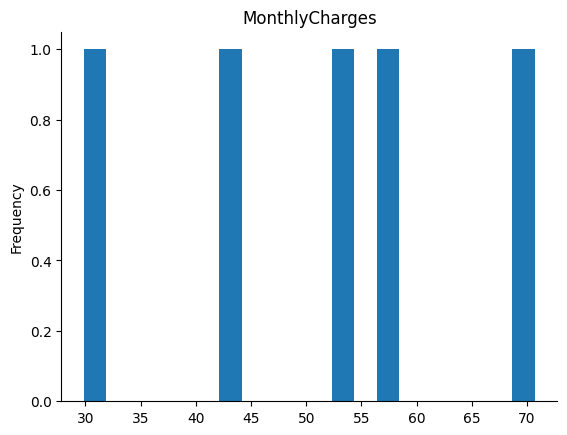

In [12]:
_df_1['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

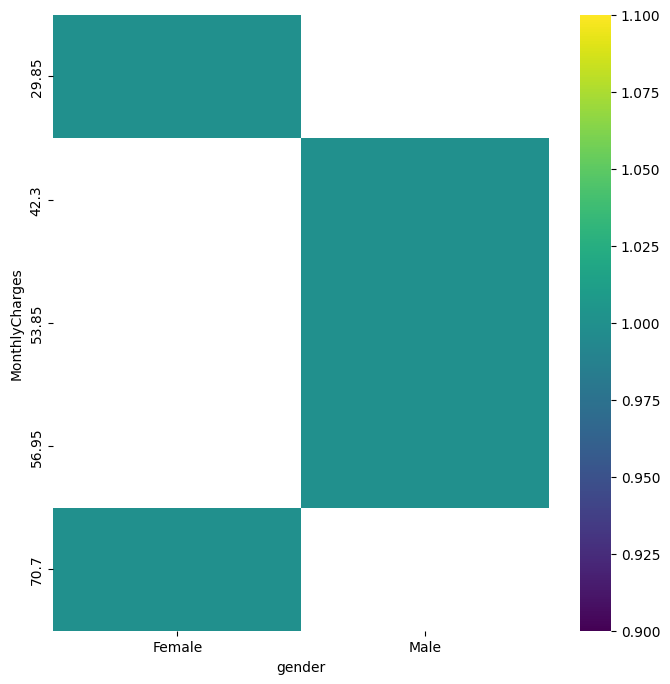

In [15]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MonthlyCharges'].value_counts()
    for x_label, grp in _df_14.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('MonthlyCharges')

In [20]:
df=df.iloc[:,1:]
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
db_dummies = pd.get_dummies(df, drop_first=True)
db_dummies.head()

<IPython.core.display.Javascript object>

,SeniorCitizen,tenure,MonthlyCharges,Churn,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from pycaret.classification import *
s = setup(df, target = 'Churn', use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,1127
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 19)"
4,Transformed data shape,"(7043, 40)"
5,Transformed train set shape,"(4930, 40)"
6,Transformed test set shape,"(2113, 40)"
7,Numeric features,3
8,Categorical features,15
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [24]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7775,0.0000,0.5266,0.5913,0.5547,0.4077,0.4102,0.5900
knn,K Neighbors Classifier,0.7710,0.0000,0.5236,0.5737,0.5465,0.3941,0.3954,0.5860
svm,SVM - Linear Kernel,0.7570,0.0000,0.4536,0.6153,0.4437,0.3168,0.3530,0.7480
lr,Logistic Regression,0.7562,0.0000,0.1391,0.7019,0.2305,0.1581,0.2320,1.5270
rf,Random Forest Classifier,0.7542,0.0000,0.1780,0.6243,0.2625,0.1754,0.2263,1.1540
et,Extra Trees Classifier,0.7473,0.0000,0.1154,0.6256,0.1936,0.1223,0.1844,0.9110
lightgbm,Light Gradient Boosting Machine,0.7469,0.0000,0.3934,0.5314,0.4357,0.2845,0.2954,0.6550
qda,Quadratic Discriminant Analysis,0.7408,0.0000,0.1047,0.5663,0.1740,0.1008,0.1524,0.6770
ridge,Ridge Classifier,0.7400,0.0000,0.0810,0.5718,0.1413,0.0810,0.1364,0.6020
lda,Linear Discriminant Analysis,0.7400,0.0000,0.0856,0.5687,0.1482,0.0847,0.1392,0.6310


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [25]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

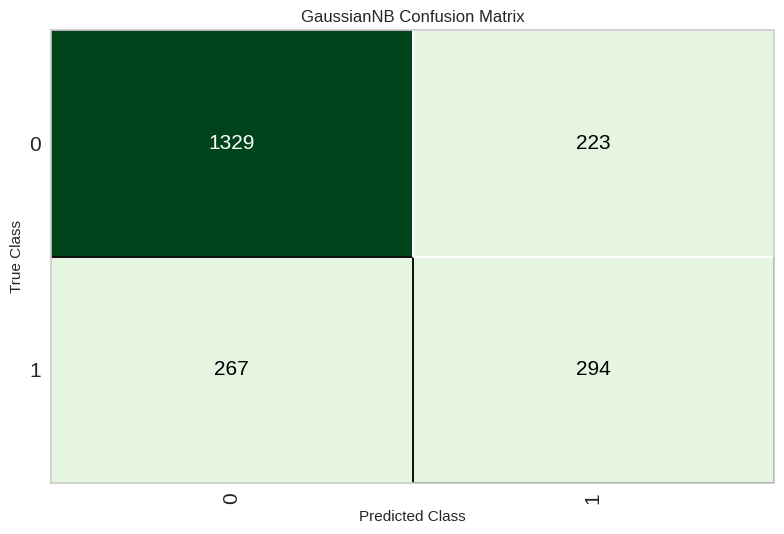

In [26]:
plot_model(best, plot = 'confusion_matrix')